In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten
from keras.optimizers import Adam, RMSprop
from sklearn.model_selection import train_test_split
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator

In [7]:
train= pd.read_csv(r'C:\Users\hnwong\Desktop\Python\digit _recognizer\train.csv')

In [8]:
train.shape

(42000, 785)

In [9]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
test=pd.read_csv(r'C:\Users\hnwong\Desktop\Python\digit _recognizer\test.csv')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
test.shape

(28000, 784)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [16]:
X_train=(train.iloc[:,1:].values).astype('float32')

In [19]:
y_train=train.iloc[:,0].values.astype('int32')
X_test=test.values.astype('float32')

In [20]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
y_train

array([1, 0, 1, ..., 7, 6, 9])

## Visualization

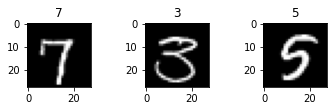

In [27]:
# Convert train dataset to (num_images, img_rows, img_cols) format
X_train= X_train.reshape(X_train.shape[0],28,28)

for i in range(6,9):
    plt.subplot(330+(i+1))
    plt.imshow(X_train[i],cmap=plt.get_cmap('gray'))
    plt.title(y_train[i])

In [29]:
# Expand 1 more dimension as 1 for colour channel gray
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_train.shape

(42000, 28, 28, 1)

In [30]:
X_test= X_test.reshape(X_test.shape[0],28,28,1)
X_test.shape

(28000, 28, 28, 1)

## Preprocessing digit images

### Feature Standardization

In [31]:
# Centralize the data
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

def standardize(x):
    return (x-mean_px)/std_px

### One Hot Encoding 

In [33]:
# One-hot vector 0,1
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
num_classes = y_train.shape[1]
num_classes

10

C:\Users\hnwong\Anaconda3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


([<matplotlib.axis.XTick at 0x12748cd0>,
 <a list of 10 Text major ticklabel objects>)

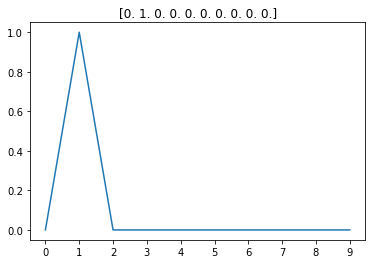

In [40]:
plt.title(y_train[2])
plt.plot(y_train[2])
plt.xticks(range(10))

## Design Neural Network Architecture

### Linear Model

In [41]:
from keras.models import Sequential
from keras.layers.core import Lambda, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D, MaxPooling2D

In [42]:
model=Sequential()
#Lambda layer (performo operations,define input dimensions format)
model.add(Lambda(standardize,input_shape=(28,28,1)))
#Flatten will transform input into 1D array
model.add(Flatten())
#Dense specify the output dimensions/classes of the model
model.add(Dense(10,activation='softmax'))
print('input shape',model.input_shape)
print('output shape',model.output_shape)

input shape (None, 28, 28, 1)
output shape (None, 10)


### Compile Network

In [44]:
from keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),
              #optimizer: update network as it sees more data and reduce loss value
             loss='categorical_crossentropy',
            #loss functinon: measure how good the network is
             metrics=['accuracy'])
            #metrics: monitor performance of network

In [45]:
from keras.preprocessing import image
gen = image.ImageDataGenerator()

### Cross Validation

In [46]:
from sklearn.model_selection import train_test_split
X=X_train
y=y_train
X_train,X_val,y_train,y_val= train_test_split(X_train,y_train,test_size=0.1,random_state=42)
batches=gen.flow(X_train,y_train,batch_size=64)
val_batches=gen.flow(X_val,y_val,batch_size=64)

In [51]:
history=model.fit_generator(generator=batches,steps_per_epoch=len(batches),epochs=3,
                           validation_data=val_batches,validation_steps=len(val_batches))

Epoch 1/3
591/591 [==============================] - 1s 2ms/step - loss: 0.2858 - accuracy: 0.9196 - val_loss: 0.3049 - val_accuracy: 0.9124
Epoch 2/3
591/591 [==============================] - 1s 2ms/step - loss: 0.2763 - accuracy: 0.9224 - val_loss: 0.3008 - val_accuracy: 0.9131
Epoch 3/3
591/591 [==============================] - 1s 2ms/step - loss: 0.2707 - accuracy: 0.9251 - val_loss: 0.2876 - val_accuracy: 0.9169


In [52]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

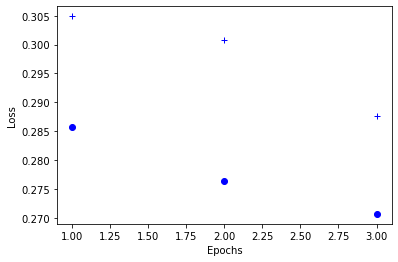

In [53]:
import matplotlib.pyplot as plt
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs= range(1,len(loss_values)+1)

plt.plot(epochs,loss_values,'bo') #'bo' = blue dot
plt.plot(epochs,val_loss_values,'b+') #'b+' = blue crosses
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

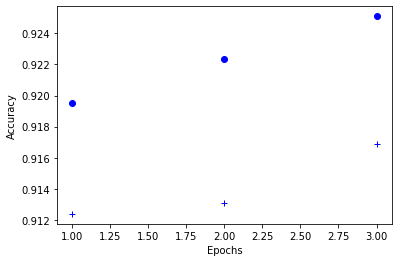

In [55]:
plt.clf() # clear figure
acc_values = history_dict['accuracy']
val_acc_values= history_dict['val_accuracy']

plt.plot(epochs,acc_values,'bo')
plt.plot(epochs,val_acc_values,'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

## Fully Connected Model

In [56]:
#Add neuron layer
def get_fc_model():
    model=Sequential([
        Lambda(standardize,input_shape=(28,28,1)),
        Flatten(),
        Dense(512,activation='relu'),
        Dense(10,activation='softmax')
    ])
    model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [57]:
fc = get_fc_model()
fc.optimizer.lr=0.01

In [62]:
history=fc.fit_generator(generator=batches,steps_per_epoch=len(batches),epochs=5,
                        validation_data=val_batches,validation_steps=len(val_batches))

Epoch 1/5
591/591 [==============================] - 2s 3ms/step - loss: 0.1926 - accuracy: 0.9506 - val_loss: 0.2497 - val_accuracy: 0.9329
Epoch 2/5
591/591 [==============================] - 2s 3ms/step - loss: 0.1842 - accuracy: 0.9516 - val_loss: 0.2315 - val_accuracy: 0.9448
Epoch 3/5
591/591 [==============================] - 2s 3ms/step - loss: 0.1685 - accuracy: 0.9569 - val_loss: 0.2921 - val_accuracy: 0.9407
Epoch 4/5
591/591 [==============================] - 2s 3ms/step - loss: 0.1735 - accuracy: 0.9558 - val_loss: 0.2752 - val_accuracy: 0.9467
Epoch 5/5
591/591 [==============================] - 2s 3ms/step - loss: 0.1615 - accuracy: 0.9610 - val_loss: 0.2374 - val_accuracy: 0.9476


In [63]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

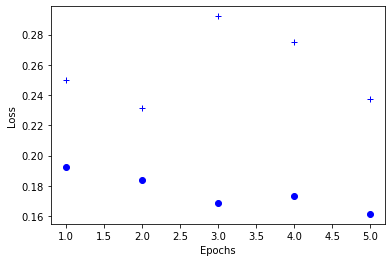

In [64]:
import matplotlib.pyplot as plt
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs= range(1,len(loss_values)+1)

plt.plot(epochs,loss_values,'bo') #'bo' = blue dot
plt.plot(epochs,val_loss_values,'b+') #'b+' = blue crosses
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

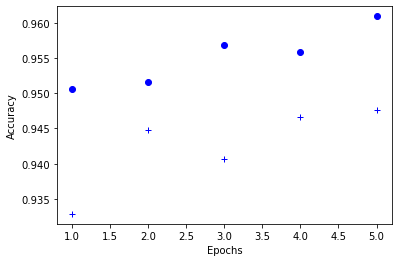

In [65]:
plt.clf() # clear figure
acc_values = history_dict['accuracy']
val_acc_values= history_dict['val_accuracy']

plt.plot(epochs,acc_values,'bo')
plt.plot(epochs,val_acc_values,'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

## Convolutional Neural Network

In [68]:
# CNN is efficient for images
from keras.layers import Convolution2D, MaxPooling2D

def get_cnn_model():
    model=Sequential([
        Lambda(standardize,input_shape=(28,28,1)),
        Convolution2D(32,(3,3),activation='relu'),
        Convolution2D(32,(3,3),activation='relu'),
        MaxPooling2D(),
        Convolution2D(64,(3,3),activation='relu'),
        Convolution2D(64,(3,3),activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(512,activation='relu'),
        Dense(10,activation='softmax')
    ])
    model.compile(Adam(),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [69]:
model=get_cnn_model()
model.optimizer.lr=0.01

In [70]:
history = model.fit_generator(generator=batches,steps_per_epoch=len(batches),epochs=3,
                             validation_data=val_batches,validation_steps=len(val_batches))

Epoch 1/3
591/591 [==============================] - 46s 79ms/step - loss: 0.2243 - accuracy: 0.9309 - val_loss: 0.1399 - val_accuracy: 0.9602
Epoch 2/3
591/591 [==============================] - 49s 83ms/step - loss: 0.0900 - accuracy: 0.9728 - val_loss: 0.0730 - val_accuracy: 0.9779
Epoch 3/3
591/591 [==============================] - 48s 81ms/step - loss: 0.0754 - accuracy: 0.9783 - val_loss: 0.0965 - val_accuracy: 0.9740


### Data Augmentation

Technique of showing sightly different or new imagrs to NN to avoid overfitting.

1) Cropping

2) Rotating

3) Scaling

4) Translating

5) Flipping

6) Adding Gaussian noise to input images

In [74]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                        height_shift_range=0.08, zoom_range=0.08)
batches= gen.flow(X_train,y_train, batch_size=64)
val_batches=gen.flow(X_val,y_val, batch_size=64)

In [76]:
model.optimizer.lr=0.001
history = model.fit_generator(generator=batches, steps_per_epoch=len(batches),epochs=3,
                             validation_data=val_batches, validation_steps= len(val_batches))

Epoch 1/3
591/591 [==============================] - 47s 80ms/step - loss: 0.1406 - accuracy: 0.9570 - val_loss: 0.1014 - val_accuracy: 0.9705
Epoch 2/3
591/591 [==============================] - 47s 80ms/step - loss: 0.0886 - accuracy: 0.9720 - val_loss: 0.0926 - val_accuracy: 0.9717
Epoch 3/3
591/591 [==============================] - 47s 80ms/step - loss: 0.0686 - accuracy: 0.9780 - val_loss: 0.0734 - val_accuracy: 0.9790


### Adding Batch Normalization

In [81]:
#Fine tune hyperparameters

from keras.layers.normalization import BatchNormalization

def get_bn_model():
    model=Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Convolution2D(32,(3,3),activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(32,(3,3),activation='relu'),
        MaxPooling2D(),
        BatchNormalization(axis=1),
        Convolution2D(64,(3,3),activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(64,(3,3),activation='relu'),
        MaxPooling2D(),
        Flatten(),
        BatchNormalization(),
        Dense(512,activation='relu'),
        BatchNormalization(),
        Dense(10,activation='softmax')
    ])
    model.compile(Adam(),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [83]:
model=get_bn_model()
model.optimizer.lr=0.01
history=model.fit_generator(generator=batches,steps_per_epoch=len(batches),epochs=3,
                           validation_data=val_batches, validation_steps=len(batches))

Epoch 1/3
591/591 [==============================] - 85s 144ms/step - loss: 0.2268 - accuracy: 0.9372 - val_loss: 0.1622 - val_accuracy: 0.9607
Epoch 2/3
591/591 [==============================] - 87s 147ms/step - loss: 0.0856 - accuracy: 0.9738
Epoch 3/3
591/591 [==============================] - 87s 148ms/step - loss: 0.0674 - accuracy: 0.9788


## Model training and Prediction

In [86]:
model.optimizer.lr=0.01
gen= image.ImageDataGenerator()
batches=gen.flow(X,y,batch_size=64)
history=model.fit_generator(generator=batches,steps_per_epoch=len(batches),epochs=3)

Epoch 1/3
657/657 [==============================] - 96s 146ms/step - loss: 0.0367 - accuracy: 0.9888
Epoch 2/3
657/657 [==============================] - 93s 141ms/step - loss: 0.0325 - accuracy: 0.9902
Epoch 3/3
657/657 [==============================] - 93s 141ms/step - loss: 0.0356 - accuracy: 0.9892


In [88]:
prediction = model.predict_classes(X_test,verbose=0)

In [91]:
submissions=pd.DataFrame({"ImageId": list(range(1,len(prediction)+1)),
                         "Label": prediction})

In [92]:
submissions

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [93]:
submissions.to_csv("DR.csv", index=False, header=True)